<a href="https://colab.research.google.com/github/JessyMadhuri/codealpha_tasks/blob/main/speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


#load the dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)


2800

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
paths[:5]

['/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_beg_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_base_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bean_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bite_happy.wav',
 '/content/drive/MyDrive/kaggle/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_boat_happy.wav']

In [ ]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

In [ ]:
df['label'].value_counts()

#Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

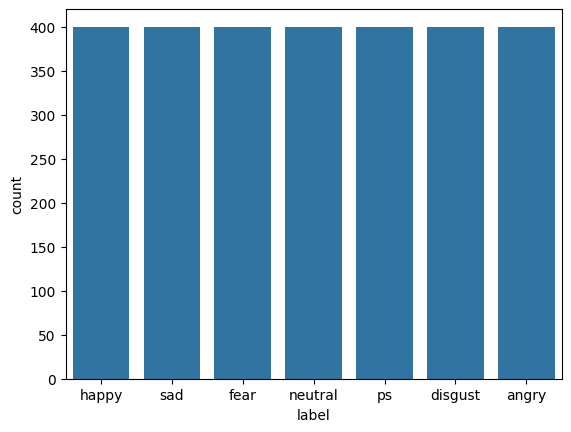

In [ ]:

sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

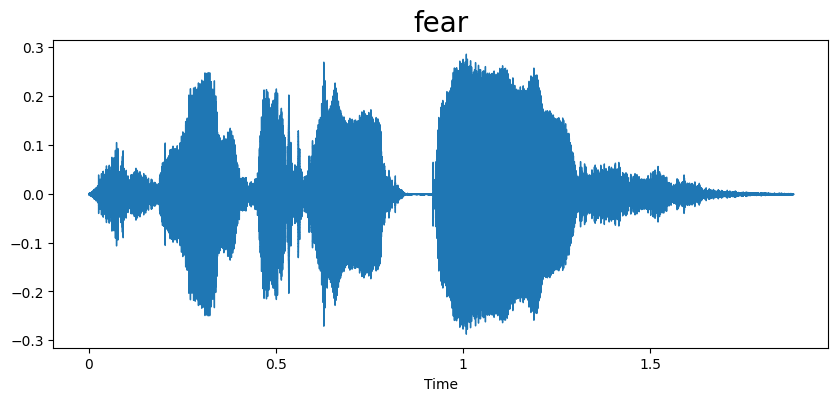

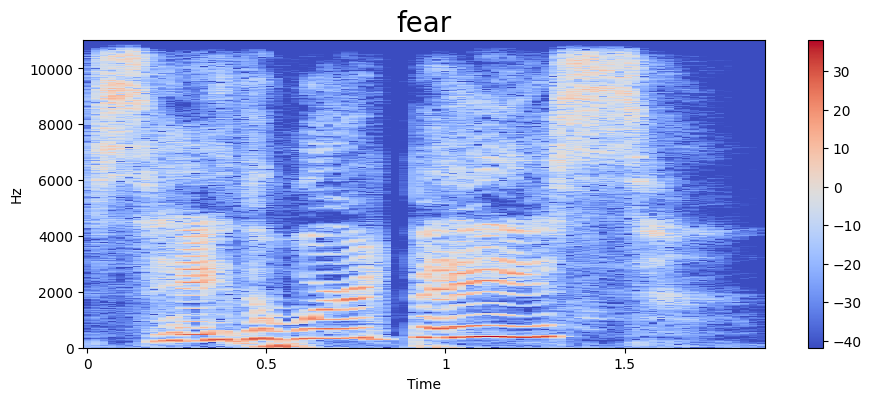

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

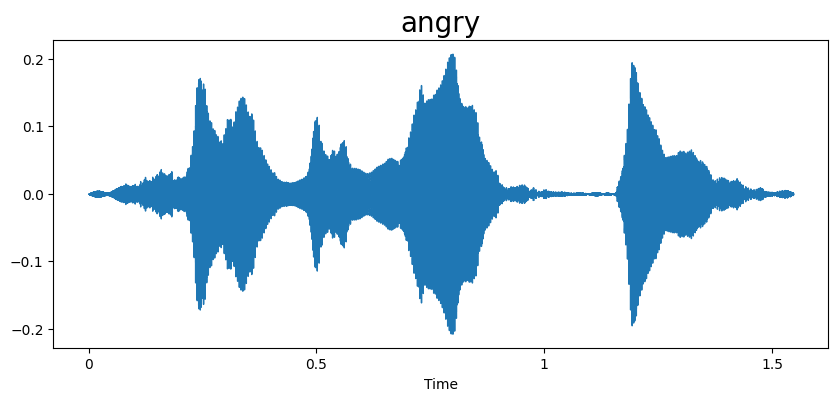

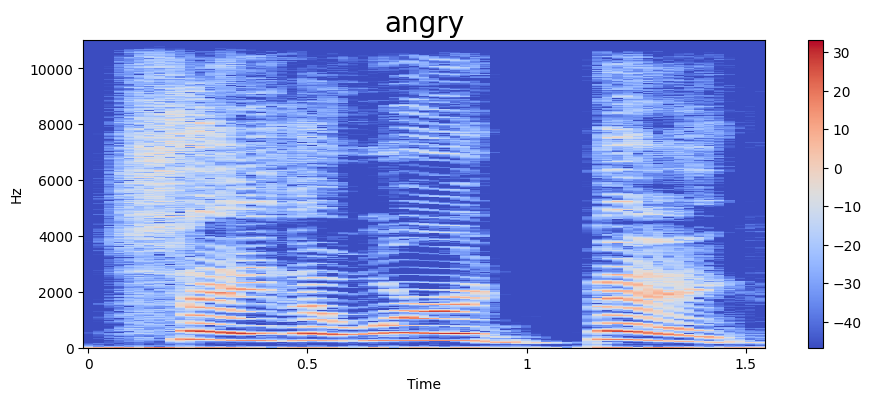

In [ ]:

emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

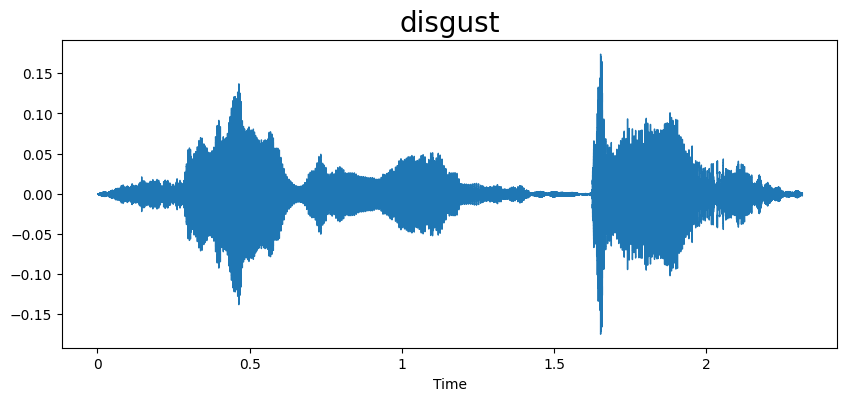

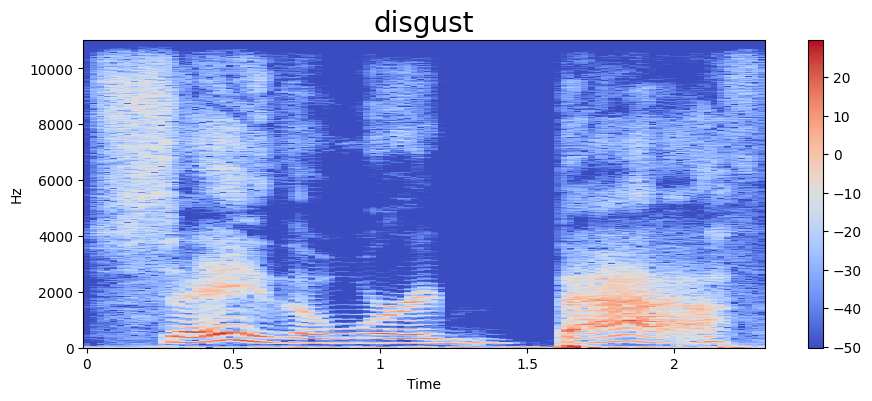

In [ ]:

emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

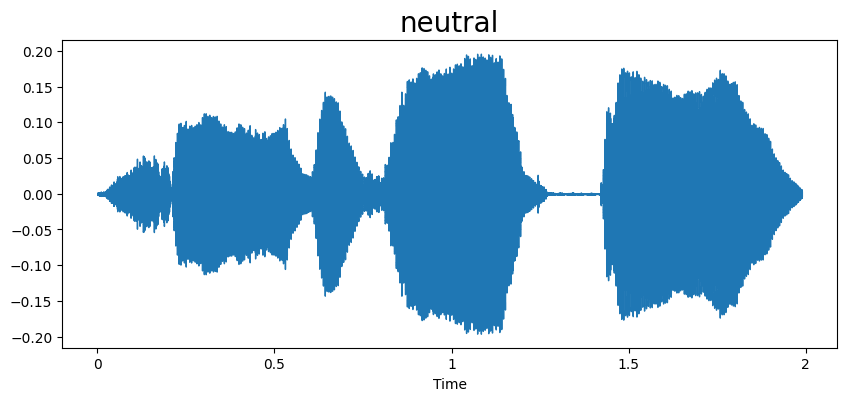

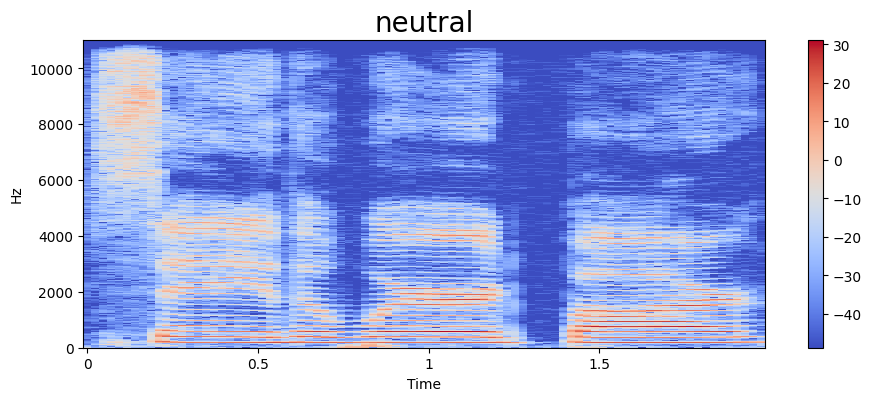

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

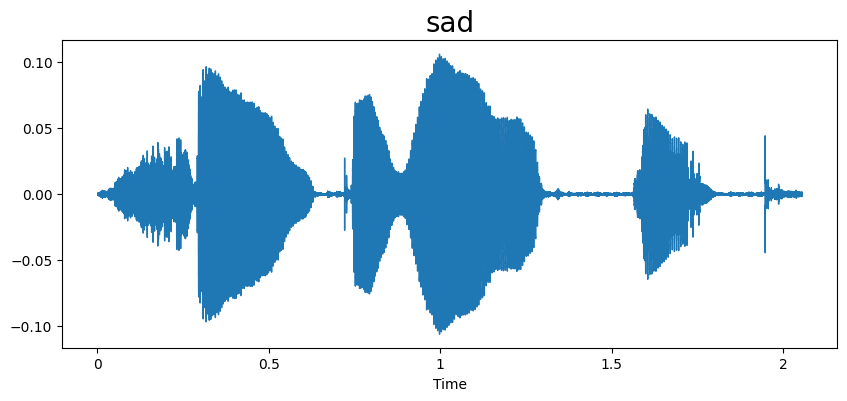

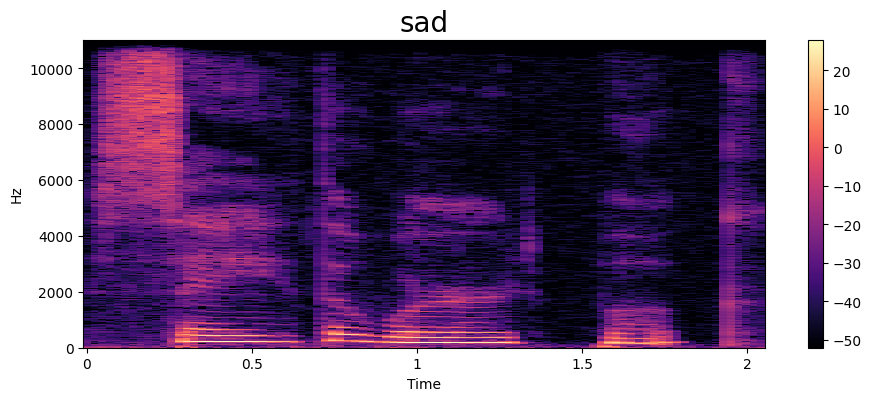

In [ ]:

emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

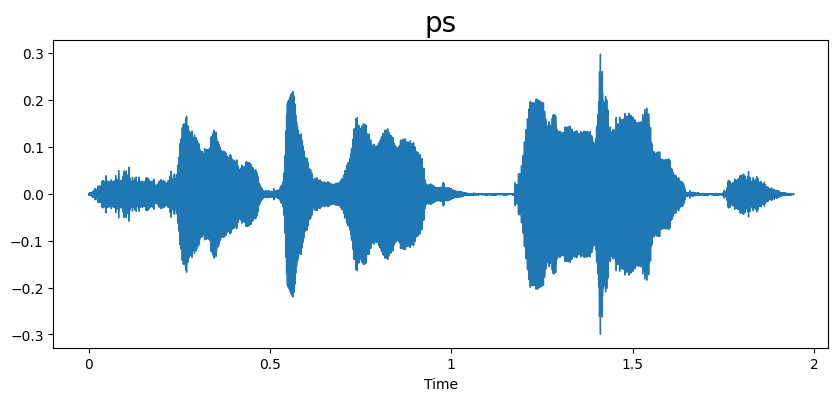

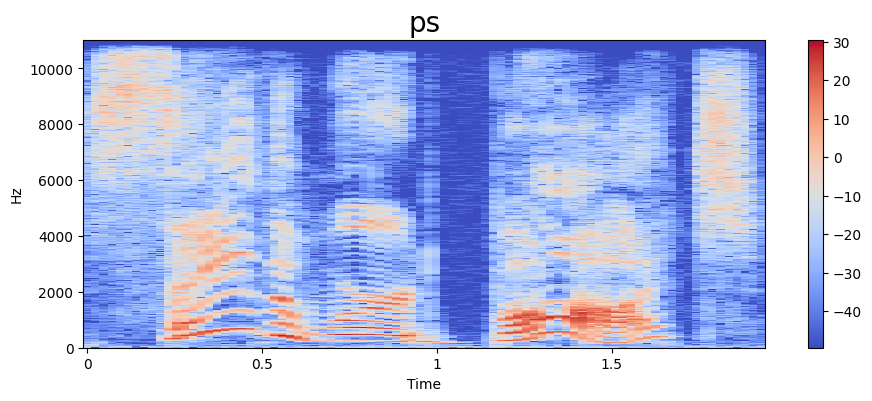

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

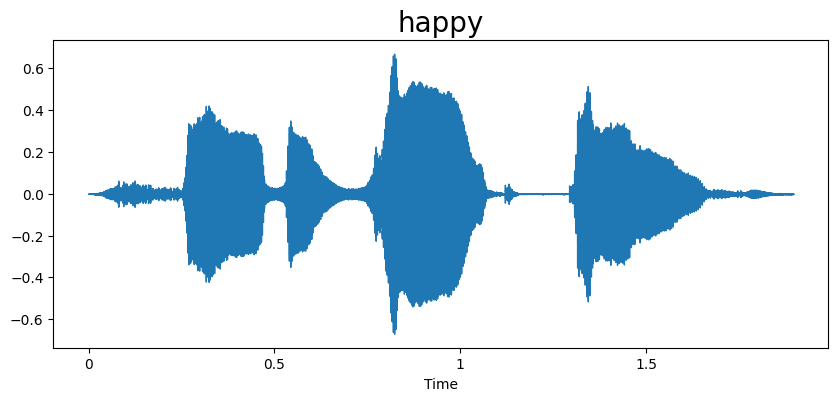

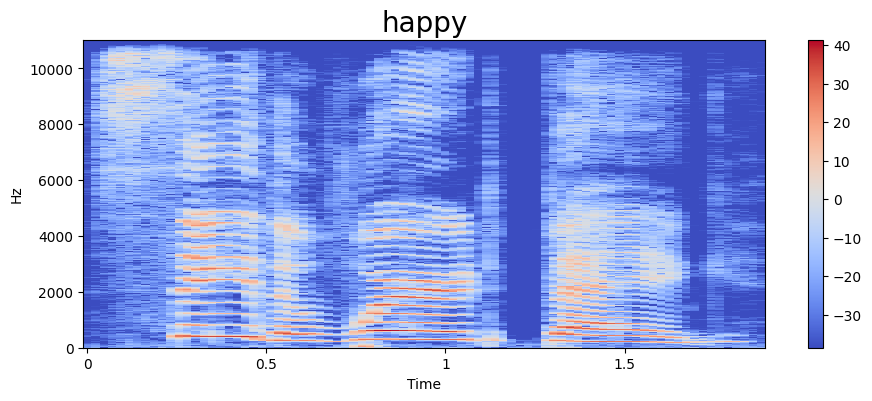

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

#Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:

extract_mfcc(df['speech'][0])

array([-3.1867844e+02,  5.8399315e+01, -1.4353562e+01,  3.0029669e+01,
       -1.8168992e+00, -1.6771873e+01, -3.9985278e+00, -1.0459593e+01,
        3.1225798e-01, -6.6449609e+00, -1.0330934e+01,  9.7562170e+00,
       -1.2587822e+01,  2.2955267e+00, -4.4138827e+00, -8.2204523e+00,
       -4.7634935e+00, -6.1824560e+00, -1.3715173e+01, -2.4238708e+00,
       -7.5459609e+00,  1.0649250e+00,  6.4581556e+00,  1.0544877e+01,
        6.3970222e+00,  7.4490137e+00, -9.8838758e-01,  5.0670376e+00,
        8.0680389e+00,  1.1144595e+01,  7.9537902e+00,  4.4994264e+00,
       -1.6325991e+00,  5.4474411e+00,  4.5129418e+00,  4.2464485e+00,
       -5.3026862e+00, -2.6249096e+00, -1.9245884e+00,  3.7671092e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-318.67844, 58.399315, -14.353562, 30.029669,...
1       [-339.07913, 27.07043, -2.782644, 22.153967, -...
2       [-325.60648, 57.70321, 10.052183, 39.220478, 9...
3       [-323.1753, 35.721375, -16.336277, 22.842546, ...
4       [-353.40176, 54.083733, -10.045905, 21.325766,...
                              ...                        
2795    [-370.97238, 50.325123, -3.4964592, 21.81727, ...
2796    [-354.5598, 48.932465, -1.0380366, 15.063576, ...
2797    [-417.4327, 40.141663, 12.793275, 25.56683, -1...
2798    [-336.45566, 42.53098, -2.962737, 1.3677515, -...
2799    [-332.07935, 58.7289, -12.947721, 25.80783, -2...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [ ]:

y = y.toarray()

In [ ]:
y.shape

(2800, 7)

#Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 12s 198ms/step - loss: 1.3105 - accuracy: 0.4875 - val_loss: 1.2912 - val_accuracy: 0.5607
Epoch 2/50
35/35 [==============================] - 8s 232ms/step - loss: 0.5222 - accuracy: 0.8147 - val_loss: 1.2681 - val_accuracy: 0.6714
Epoch 3/50
35/35 [==============================] - 7s 190ms/step - loss: 0.3156 - accuracy: 0.8951 - val_loss: 1.3077 - val_accuracy: 0.6232
Epoch 4/50
35/35 [==============================] - 6s 178ms/step - loss: 0.2067 - accuracy: 0.9384 - val_loss: 1.2762 - val_accuracy: 0.7036
Epoch 5/50
35/35 [==============================] - 7s 189ms/step - loss: 0.1960 - accuracy: 0.9411 - val_loss: 0.9280 - val_accuracy: 0.7625
Epoch 6/50
35/35 [==============================] - 6s 184ms/step - loss: 0.1190 - accuracy: 0.9656 - val_loss: 0.9365 - val_accuracy: 0.7857
Epoch 7/50
35/35 [==============================] - 6s 165ms/step - loss: 0.1038 - accuracy: 0.9688 - val_loss: 1.6416 - val_accuracy: 0.7018
Epoch

#Plot the results

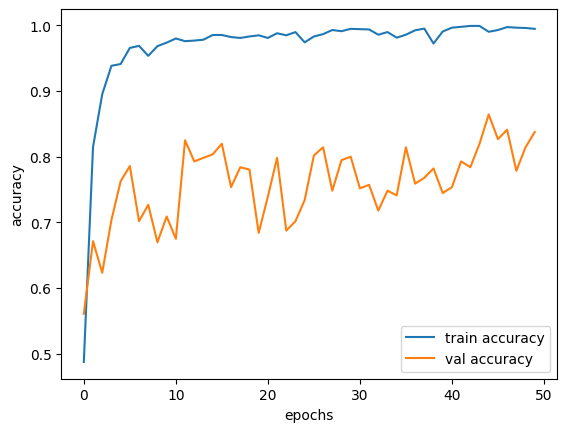

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

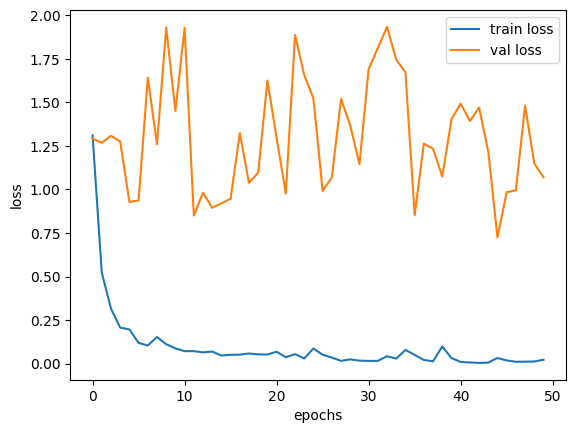

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()